In [1]:
import numpy as np
import scipy as scipy
from scipy import optimize
import pylab as pl
import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [2]:
#Define Lorentzian function
def Lorentzian1(x, amp1, xc1, wid1,y0=0):
    return amp1*wid1/((x-xc1)**2+wid1**2)+y0


#Define Lorentzian error function
def Lorentzian1_err(x, amp1, xc1, wid1,y0=0):
    return np.sqrt((amp1*wid1/((x-xc1)**2+wid1**2))*(amp1*wid1/((x-xc1)**2+wid1**2))+(y0*y0))


def Lorentzian2(x, amp1, xc1, wid1, amp2,xc2,wid2,y0):
    return (amp1*wid1/((x-xc1)**2+wid1**2)) +\
            (amp2*wid2/((x-xc2)**2+wid2**2)) +\
                y0


def Lorentzian3(x, amp1, xc1, wid1, amp2,xc2,wid2, amp3,xc3,wid3):
    return (amp1*wid1/((x-xc1)**2+wid1**2)) +\
            (amp2*wid2/((x-xc2)**2+wid2**2)) +\
                (amp3*wid3/((x-xc3)**2+wid3**2))



#Define Gaussian function
def Gaussian1(x, amp1=1000000,xc1=0.0,sigma1=0.1,y0=1.0e6):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x_array-xc1)/sigma1)**2)))+y0



#Define Voigt function
def Voigt1(x,ampG1,sigmaG1,ampL1,xcL1,widL1,y0=0):
    return (ampG1*(1/(sigmaG1*(np.sqrt(2*np.pi))))*(np.exp(-((x-xcL1)**2)/((2*(sigmaG1**2))))))+\
		((ampL1*widL1/((x-xcL1)**2+widL1**2)))+y0

def Voigt3(x,ampG1,sigmaG1,ampL1,xcL1,widL1,y0=0):
    return (ampG1*(1/(sigmaG1*(np.sqrt(2*np.pi))))*(np.exp(-((x-xcL1)**2)/((2*(sigmaG1**2))))))+\
		(((ampL1)*widL1/((x-xcL1)**2+widL1**2)))+y0

def Voigt4(x,amp,sigmaG,xc,widL,mu=0,y0=0):
    return (y0*1.0+(amp*((mu*(1./(sigmaG*np.sqrt(2*np.pi)))*np.exp(-((x-xc)**2)/(2*(sigmaG**2)))+\
                         ((1.-mu)*widL/(((x-xc)**2) + (widL**2)))))))

# Filenames:
# Unstrained Graphene Map.txt
# 20um_0deg_wet_5umPillar.txt
# 20um_0deg_wet_10umPillar.txt
# 20um_45deg_wet_5umPillar.txt
# 20um_45deg_wet_10umPillar_Area1.txt
# 20um_45deg_wet_10umPillar_Area3a.txt

#### note that 
#remove nan
#reads array and sets nan as false
#print(~np.isnan(df))
#removes nan values - may reshape array
#print(df[~np.isnan(df)])
#any(axis=1) function allows to set rows with/without nan as true
#print(~np.isnan(df).any(axis=1))
#retain structure but remove nan rows
#print(df[~np.isnan(df).any(axis=1), :])
##define Lorentzian fit fuction for data, to return value at specified Q

In [3]:
df = pd.read_csv('Unstrained Graphene Map.txt', sep='\t', header=None)
#print(df)


In [3]:
def loadRaman(filename, start=None, end=None):
    
    df = pd.read_csv(filename, sep='\t', header=None)
    df_RamanData = df.transpose()
    df_RamanData.columns = pd.MultiIndex.from_arrays([df_RamanData.iloc[0],df_RamanData.iloc[1]])
    df_RamanData = df_RamanData.iloc[2:]
    df_RamanData.set_index(df_RamanData.columns[0], inplace=True)
    df_RamanData.rename_axis('Raman Shift', inplace =True)
    
    df_RamanData = df_RamanData[(df_RamanData.index>=start) & (df_RamanData.index<=end)]
    """ 
    This function takes the file with the raman data, transposes it so the raman shift is 
    on the 0 axis, then it sets the y coordinate as the axis 1 index. It then removes the 
    first two rows, which are the y and x coordinates respectively, then sets the Raman Shift
    as the index column and renames it.
    Can set the function to show everything, or, for example can set it to show the range of 
    2300-2700cm^-1
    This is useful for plotting all data
    """
    return df_RamanData

def switchindex(df_Data):
    df_new = df_Data.T.reset_index()
    return df_new

    '''This function transposes the data so that you have the Raman shift as the header. This is useulf for selecting out one pixel at a time (where x- and y- coordinates would be in the first two columns'''
#loadRaman('Unstrained Graphene Map.txt', start=2400, end=2800)

<function matplotlib.pyplot.show(close=None, block=None)>

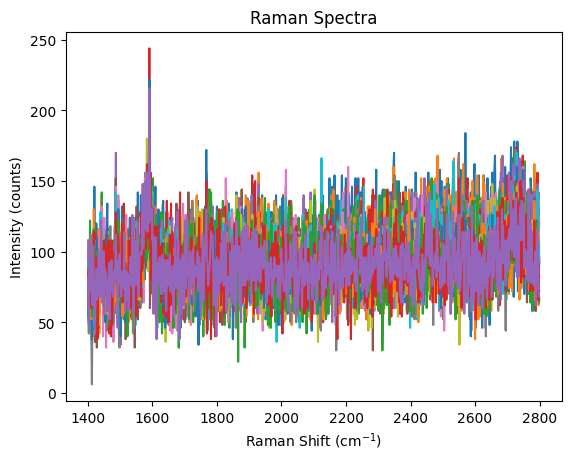

In [ ]:
df1 = loadRaman(r"C:\Users\jackm\OneDrive - Loughborough University\Year 4 Physics\Final Year Project\Measurements\Raman Measurements\wk8 s2\Accumulation 1.txt",start= 1400, end=2800)
df2 = loadRaman(r"C:\Users\jackm\OneDrive - Loughborough University\Year 4 Physics\Final Year Project\Measurements\Raman Measurements\wk8 s2\Accumulation 2.txt",start= 1400, end=2800)

df_RamanData = (df1 + df2)/2

for column in df_RamanData:
        pl.plot(df_RamanData.index, df_RamanData[column], label=f'Intensity{column}')
    
pl.xlabel(r'Raman Shift (cm$^{-1}$)')
pl.ylabel('Intensity (counts)')
pl.title('Raman Spectra')
pl.show

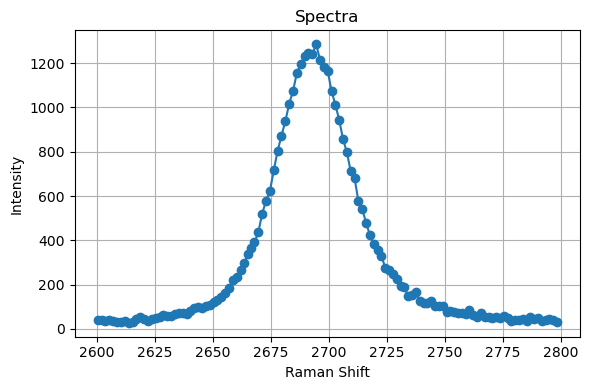

In [6]:
#If we want to filter, select row number, First 2 columns are not plot as these contain x- and y- coordinates
df_new=switchindex(df_RamanData)
#df_new.shape #first # = number of spectra(+1)
row_num = 63
# Extract row values and plot
pl.figure(figsize=(6, 4))
pl.plot(df_new.columns[2:], df_new.iloc[row_num,2:], marker='o')
pl.title(f'Row {row_num} - Values by Column')
pl.xlabel('Raman Shift')
pl.ylabel('Intensity')
pl.title('Spectra')
pl.grid(True)
pl.tight_layout()
pl.show()

In [ ]:
# Fitting the voigt

'''# Select the x and y data for the optimise function
y = filtered.iloc[:,0]
x = filtered.index'''

# Parameters for voigt fit
ampG1 = 1800
sigmaG1 = 14.28
ampL1 = 1800
xcL1 = 2704
widL1 = 27.5
yo = 30

bnds3 = ([0,1,0,2650,0,0,-25], [5000,30,5000,2750,60,1,65])

popt_Voigt3, pcov_Voigt3 = scipy.optimize.curve_fit(Voigt3, df_new.columns[2:], df_new.iloc[row_num,2:], 
                                                  p0=[ampG1,sigmaG1,ampL1,xcL1,widL1,yo])

#alternative fit
mu2=0.5


amp1=1800.
sigmaG2=14.28
xc2=2704.
widL2=27.5
bnds4=([0,5,2650,1,0,0], [2400,500,2750,500,1,100])
popt_Voigt4, pcov_Voigt4 = scipy.optimize.curve_fit(Voigt4, df_new.columns[2:], df_new.iloc[row_num,2:], 
                                                  p0=[amp1,sigmaG2,xc2,widL2,mu2,yo], bounds=bnds4)

print(popt_Voigt3)


[2.08876422e+04 1.52559722e+01 1.37896611e+04 2.69315754e+03
 1.94051411e+01 7.46692984e+00]


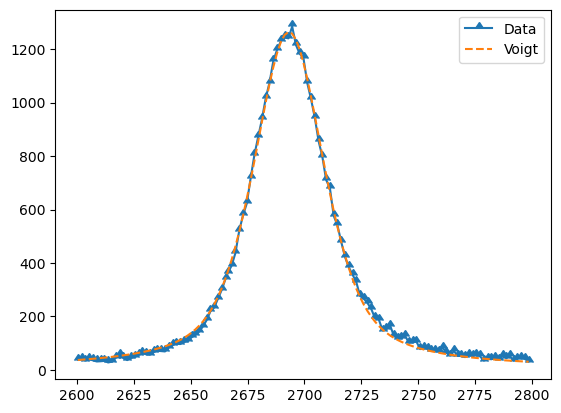

In [8]:
# Proof that I can fit and plot one set of spectral data
pl.plot(df_new.columns[2:], df_new.iloc[row_num,2:], label='Data', marker = 10)

x=df_new.columns[2:]
pl.plot(x, Voigt3(x,ampG1=popt_Voigt3[0], sigmaG1=popt_Voigt3[1], ampL1=popt_Voigt3[2], xcL1=popt_Voigt3[3],
                  widL1=popt_Voigt3[4],y0=popt_Voigt3[5]), label='Voigt', linestyle='dashed')


pl.legend()
pl.show()



<function matplotlib.pyplot.show(close=None, block=None)>

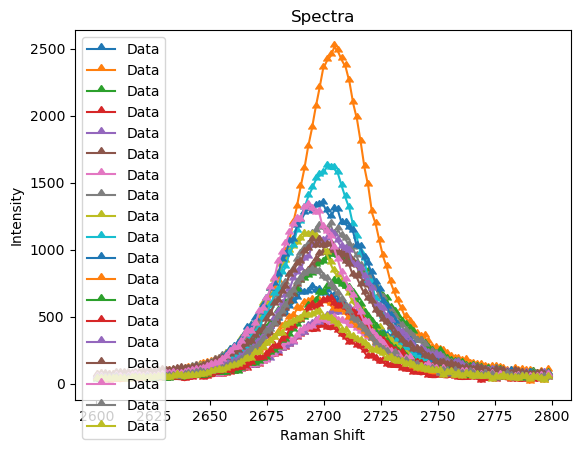

In [9]:
##plot a subset of the data - no selection, just by row number

for i in range(1,20,1):
    pl.plot(df_new.columns[2:], df_new.iloc[i,2:], label='Data', marker = 10)
   #add x- y- label from df_new.columns[0:1] 
pl.xlabel('Raman Shift')
pl.ylabel('Intensity')
pl.title('Spectra')
pl.legend()
pl.show

C:\Users\phkm2\AppData\Local\Temp\ipykernel_28908\1758834812.py:11: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  level = df.groupby(level=0, axis=1)


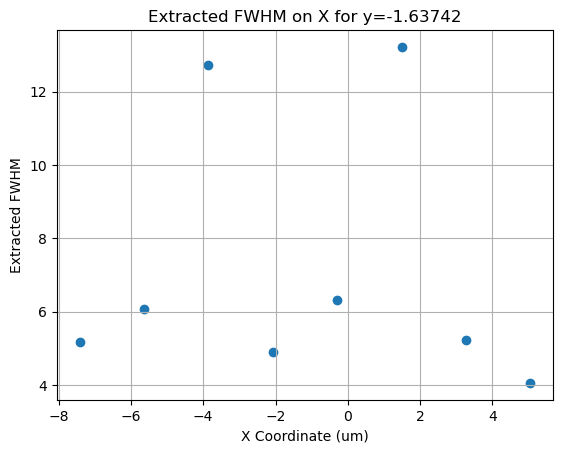

In [10]:
## Fit and plot the value of FWHM
def FWHM_vs_x(df, coordIndex):
    
    '''
    This function takes the index of a y coord as an argument extracts the relevant group of x coordinates 
    and the spectral data in the columns attched to each one. It then fits the data to a voigt profile 
    according to the parameters 
    
    '''

    level = df.groupby(level=0, axis=1)
    # Get the desired group
    desired_group_key = list(level.groups.keys())[coordIndex]  # index of the desired y coordinate group
    desired_group = level.get_group(desired_group_key)

    # Initialize lists to store extracted data
    extractedXCoord = []
    extractedFWHM = []

    # Perform the fit on the desired group
    for group_name, group_data in desired_group.items():
        y = group_data
        x = group_data.index
    
        # Parameters for voigt fit
        ampG1 = 1500
        xcG1 = 2707.17
        sigmaG1 = 35.6
        ampL1 = 1500
        xcL1 = 2707.17
        widL1 = 40.6
        yo = 34
    
        # Perform the fit
        bnds3 = ([0,0,0,2600,0,0], [2600,50,2600,2800,60,200])
        popt_Voigt, pcov_Voigt = scipy.optimize.curve_fit(Voigt1, x, y, 
                                            p0=[ampG1, sigmaG1, ampL1, xcL1, widL1, yo], bounds=bnds3, maxfev=8000)
    
        # Extract fitted parameters - you could change the number here to switch from FWHM to other parameters
        extractedFWHM_value = popt_Voigt[4]
    
        # Extract the x-coordinate from group_name
        extractedXCoord_value = group_name[1]
    
        
        extractedXCoord.append(extractedXCoord_value)
        extractedFWHM.append(extractedFWHM_value)

    # Plot extracted x-coordinate against extracted FWHM
    pl.scatter(extractedXCoord, extractedFWHM)
    pl.xlabel('X Coordinate (um)')
    pl.ylabel('Extracted FWHM')
    pl.title(f'Extracted FWHM on X for y={group_name[0]}')
    pl.grid(True)
    
    return pl.show()

FWHM_vs_x(loadRaman('Unstrained Graphene Map.txt', start=2500, end=2800), 2)

In [ ]:
#adjust above to plot all the fit values (so you can constrain the bounds)
#will also need to replace the groupby function

C:\Users\phkm2\AppData\Local\Temp\ipykernel_28908\2582688791.py:23: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  Level = Data.groupby(level=0, axis=1)


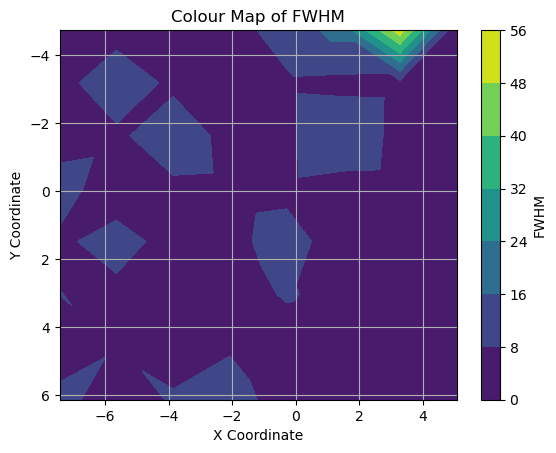

In [15]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib as mpl
from matplotlib.colors import Normalize
from matplotlib.colors import BoundaryNorm


def FWHM_colormap(Data, ampG1=None, sigmaG1=None, 
                  ampL1=None, xcL1=None, widL1=None, yo=None):
    '''
    This function fits the data to a Voigt profile according to the parameters and plots a colormap with the extracted
    x and y coords on the x-y plane and the full-width-half-max values on the z-axis for the entire dataset.
    '''
    extractedXCoord = []
    extractedYCoord = []
    extractedFWHM = []
    e_ampG = []
    e_sigmaG = []
    e_ampL = []
    e_xc = []
    e_y0 = []
    bnds3 = ([0,0,0,2600,0,0], [2800,50,2800,2800,60,200])
    Level = Data.groupby(level=0, axis=1)

    for _, group_data in Level:
        for group_name, group_data in group_data.items():
            y = group_data
            x = group_data.index
                        
            # Perform the fit
            popt_Voigt, pcov_Voigt = scipy.optimize.curve_fit(Voigt1, x, y, 
                                                p0=[ampG1, sigmaG1, ampL1, xcL1, widL1, yo], bounds=bnds3, maxfev = 80000)
        
            # Extract fitted parameters
            extractedFWHM_value = popt_Voigt[4]

#             extractedFWHM_value = popt_Voigt[2]
        
            # Extract the x-coordinate and y-coordinate
            extractedXCoord_value = group_name[1]
            extractedYCoord_value = group_name[0]
        
            if extractedFWHM_value >= 0:
                extractedXCoord.append(extractedXCoord_value)
                extractedYCoord.append(extractedYCoord_value)
                extractedFWHM.append(extractedFWHM_value)
                e_ampG.append(popt_Voigt[0])
                e_sigmaG.append(popt_Voigt[1])
                e_ampL.append(popt_Voigt[2])
                e_xc.append(popt_Voigt[3])
                e_y0.append(popt_Voigt[5])
    
    pl.tricontourf(extractedXCoord, extractedYCoord, extractedFWHM, cmap='viridis')
    cbar = pl.colorbar(label='FWHM')
    pl.gca().invert_yaxis()

    
    pl.xlabel('X Coordinate')
    pl.ylabel('Y Coordinate')
    pl.title(f'Colour Map of FWHM')
    pl.grid(True)
    pl.show()
    return extractedXCoord, extractedYCoord,  extractedFWHM, e_ampG, e_sigmaG, e_ampL, e_xc, e_y0

#The only trick/issue with teh optimise function is that if you have not set the parameters well, it will not optimise

Xcoord, Ycoord, e_FWHM, e_ampG, e_sigmaG, e_ampL, e_xc, e_y0 = FWHM_colormap(loadRaman('Unstrained Graphene Map.txt', start=2500, end=2900),
             ampG1=1500, sigmaG1=35.6, ampL1=1500, xcL1=2707, widL1=40.6, yo=23.6)






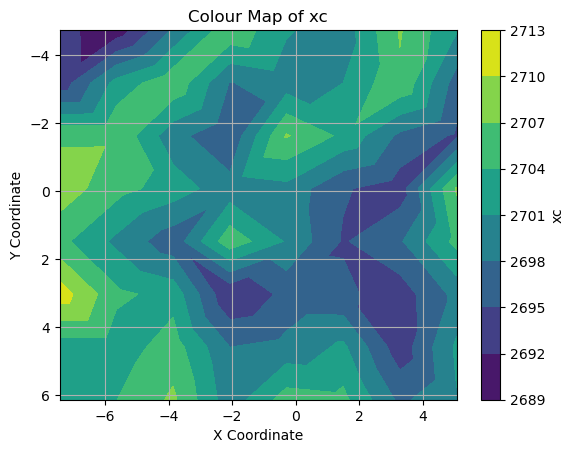

In [16]:
pl.tricontourf(Xcoord, Ycoord, e_xc, cmap='viridis')
cbar = pl.colorbar(label='xc')
pl.gca().invert_yaxis()

    
pl.xlabel('X Coordinate')
pl.ylabel('Y Coordinate')
pl.title(f'Colour Map of xc')
pl.grid(True)
pl.show()

C:\Users\phkm2\AppData\Local\Temp\ipykernel_13100\2344430001.py:24: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  LevelA = SetA.groupby(level=0, axis=1)
C:\Users\phkm2\AppData\Local\Temp\ipykernel_13100\2344430001.py:25: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  LevelB = SetB.groupby(level=0, axis=1)


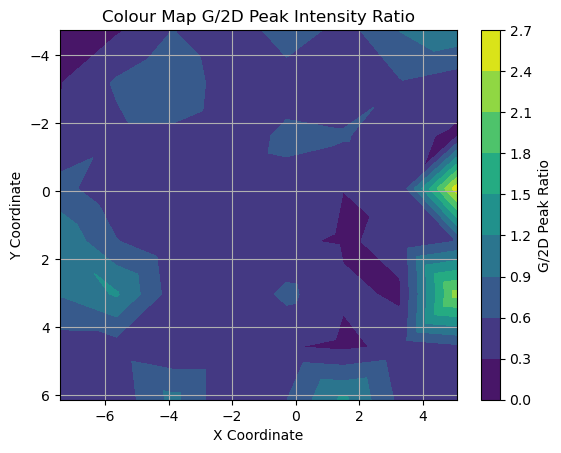

In [53]:
## Plot map of G/2D ratio


import warnings
# Upon return write something that will prove you can colourmap the G/2D peak ratio
SetA = loadRaman('Unstrained Graphene Map.txt',start=1500,end=1700)
SetB = loadRaman('Unstrained Graphene Map.txt',start=2500,end=2900)



# Define parameters
ampG1 = 2000
sigmaG1 = 17.11
ampL1 = 2000
xcL1 = 1583.62
widL1 = 21.98
yo_1 = 34

ampG2 = 1500
sigmaG2 = 35.6
ampL2 = 1500
xcL2 = 2707.17
widL2 = 40.6
yo_2 = 34

LevelA = SetA.groupby(level=0, axis=1)
LevelB = SetB.groupby(level=0, axis=1)

#extract x and y coordinates

Coordinates = []
X = []
Y = []

# Lists to store the maximum values from each fitted curve
max_values_A = []
max_values_B = []
desired_group_key = []
warnings.filterwarnings("ignore", category=optimize.OptimizeWarning)
for (group_key_A, group_A), (group_key_B, group_B) in zip(LevelA, LevelB):
    # Ensure that the group keys match
    if group_key_A == group_key_B:
        desired_group_key.append(group_key_A)  # Assuming you want to keep track of group keys
        
        Coordinates.append(list(group_A.columns))
        
        # Iterate over each column in group_A and group_B
        for col_A, col_B in zip(group_A.columns, group_B.columns):
            # Fit curve for LevelA
            popt_A, pcov_A = scipy.optimize.curve_fit(Voigt1, group_A.index, group_A[col_A], 
                                                       p0=[ampG1, sigmaG1, ampL1, xcL1, widL1, yo_1], maxfev=8000)
            fitted_curve_A = Voigt1(group_A.index, *popt_A)
            max_values_A.append(np.max(fitted_curve_A))
        
            # Fit curve for LevelB
            popt_B, pcov_B = scipy.optimize.curve_fit(Voigt1, group_B.index, group_B[col_B], 
                                                       p0=[ampG2, sigmaG2, ampL2, xcL2, widL2, yo_2], maxfev=8000)
            fitted_curve_B = Voigt1(group_B.index, *popt_B)
            max_values_B.append(np.max(fitted_curve_B))
        
    else:
        # Handle the case where the group keys don't match
        print("Group keys don't match:", group_key_A, group_key_B)
        
    for element in Coordinates:
    # Initialize lists to store x and y coordinates for the current element
        x_coords_element = []
        y_coords_element = []
    
    # Iterate over each tuple in the current element
    for tuple in element:
        # Extract x and y coordinates from the tuple
        y_coord, x_coord = tuple
        # Append x and y coordinates to the lists
        x_coords_element.append(x_coord)
        y_coords_element.append(y_coord)
    
    # Append x and y coordinates for the current element to the main lists
    X.append(x_coords_element)
    Y.append(y_coords_element)



# Create DataFrames to store the maximum values
max_values_df_A = pd.DataFrame(max_values_A, columns=['Max Values A'])
max_values_df_B = pd.DataFrame(max_values_B, columns=['Max Values B'])

Ratio_2DG = []

for index, (max_value_A, max_value_B) in enumerate(zip(max_values_df_A['Max Values A'], max_values_df_B['Max Values B'])):
    # Perform division, handle divide by zero case
    if max_value_A != 0:
        ratio = max_value_A / max_value_B  
    else:
        ratio = float('inf')  # Handle divide by zero case
    
    # Append the results to the list
    Ratio_2DG.append(ratio)

# Create a DataFrame from the results list
results_df = pd.DataFrame(Ratio_2DG, columns=['Ratio'])

y_flat = []
[y_flat.extend(sublist) for sublist in Y]

x_flat =[]
[x_flat.extend(sublist) for sublist in X]


#display(results_df)

pl.tricontourf(x_flat, y_flat, Ratio_2DG, cmap='viridis')
cbar = pl.colorbar(label='G/2D Peak Ratio')

pl.gca().invert_yaxis()
pl.xlabel('X Coordinate')
pl.ylabel('Y Coordinate')
pl.title(f'Colour Map G/2D Peak Intensity Ratio')
pl.grid(True)
pl.show()






In [21]:
###Additional tools - not yet tested

def PeakShifting(ycoord):
    
    desired_group_key = list(Level.groups.keys())[ycoord]  # Replace 'coord' with the index of the desired group
    desired_group = Level.get_group(desired_group_key)

    max_intensity_pos = []
    x_coords = []

    for group_name, group_data in desired_group.items():  # Use .items() to iterate over column name, column data pairs
        y = group_data
        x = group_data.index
    
        # Parameters for voigt fit
        ampG1 = 1650
        xcG1 = 2700
        sigmaG1 = 15
        ampL1 = 1650
        xcL1 = 2700
        widL1 = 40
        yo = 0
        
    
        # Perform the fit
        popt_Voigt, pcov_Voigt = scipy.optimize.curve_fit(Voigt1, x, y, 
                                                      p0=[ampG1, sigmaG1, ampL1, xcL1, widL1, yo])
    
        # Extract fitted parameters
        ampG, xcG, sigmaG, ampL, xcL, widL, yo = popt_Voigt
    
        # Generate fitted curve
        fitted_curve = Voigt1(x, ampG, sigmaG, ampL, xcL, widL, yo)
    
        maxIntensityPos = np.argmax(fitted_curve)
    
        x_coords.append(group_name[1])
        max_intensity_pos.append(x[maxIntensityPos])
    
    pl.scatter(x_coords, max_intensity_pos, marker='o')
    pl.xlabel('X-Coordinate')
    pl.ylabel('Max Intensity Position')
    pl.legend()

    return pl.show()    

In [46]:
###Additional tools - not yet tested


from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib as mpl
from matplotlib.colors import Normalize
from matplotlib.colors import BoundaryNorm


def ExtractParameters(Data, ampG1=None, sigmaG1=None, ampL1=None, xcL1=None, widL1=None, yo=None):
    '''
    This function fits the data to a Voigt profile according to the parameters and plots a colormap with the extracted
    x and y coords on the x-y plane and the full-width-half-max values on the z-axis for the entire dataset.
    '''

    
    Level = Data.groupby(level=0, axis=1)

    for _, group_data in Level:
        for group_name, group_data in group_data.items():
            y = group_data
            x = group_data.index
                        
            # Perform the fit
            popt_Voigt, pcov_Voigt = scipy.optimize.curve_fit(Voigt1, x, y, 
                                                p0=[ampG1, sigmaG1, ampL1, xcL1, widL1, yo], maxfev = 8000)
            # Extract fitted parameters
            exAmpG_value = popt_Voigt[0]
            exSigma_value = popt_Voigt[1]
            exAmpL_value = popt_Voigt[2]
            exLxPos_value = popt_Voigt[3]
            exWidL_value = popt_Voigt[4]
            yo_value = popt_Voigt[5]
            
            # Extract the x-coordinate and y-coordinate
            extractedXCoord_value = group_name[1]
            extractedYCoord_value = group_name[0]
            
            # Will set any negatives to -1 for the plot      
           
            exAmpG.append(exAmpG_value)
            exSigma.append(exSigma_value)
            exAmpL.append(exAmpL_value)
            exLxPos.append(exLxPos_value)
            exWidL.append(exWidL_value)
            y0.append(yo_value)
            
    
            
            
    return extractedXCoord, extractedYCoord, exAmpG, exSigma, exAmpL, exLxPos, exWidL, y0


ExtractParameters(loadRaman('20um_0deg_wet_5umPillar.txt', start=1500, end=1700),
                  ampG1=600, sigmaG1=5.096, ampL1=600, xcL1=1582, widL1=21.1, yo=23.6)


C:\Users\phkm2\AppData\Local\Temp\ipykernel_13100\1277452485.py:15: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  Level = Data.groupby(level=0, axis=1)


NameError: name 'exAmpG' is not defined